# Final Exam - SVM 

## Full Name: Sara Ahmadi

## Number: 002348217

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

# Loading data
iris = datasets.load_iris()

In [2]:
X, y = iris.data[:, :2], iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [3]:
C = 1.0 # regularization parameter
lin_svc = svm.LinearSVC(C=C, dual=False)
lin_svc.fit(X_train, y_train)

LinearSVC(dual=False)

### Question 1: Calculate the score of well-classified samples on the test dataset.

In [4]:
# Calculate the score on the test dataset
score = lin_svc.score(X_test, y_test)
print(f"Accuracy on the test dataset: {score}")

Accuracy on the test dataset: 0.8266666666666667


Text(0.5, 1.0, 'LinearSVC')

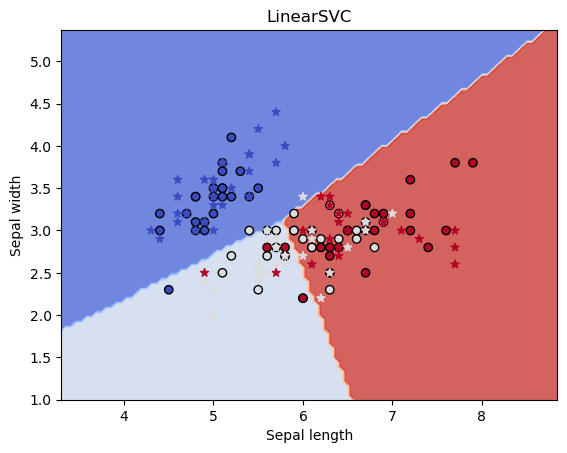

In [5]:
# Create the discretized decision surface
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# To display the decision surface we will discretize the space with a step h
h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Decision surface
Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Also show learning points
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("LinearSVC")

### Question 2: Test different values for the parameter C. How does the decision boundary evolve as a function of C?. Based on the visualization above, does this model seem appropriate to the problem? If not, what can be done to improve it?

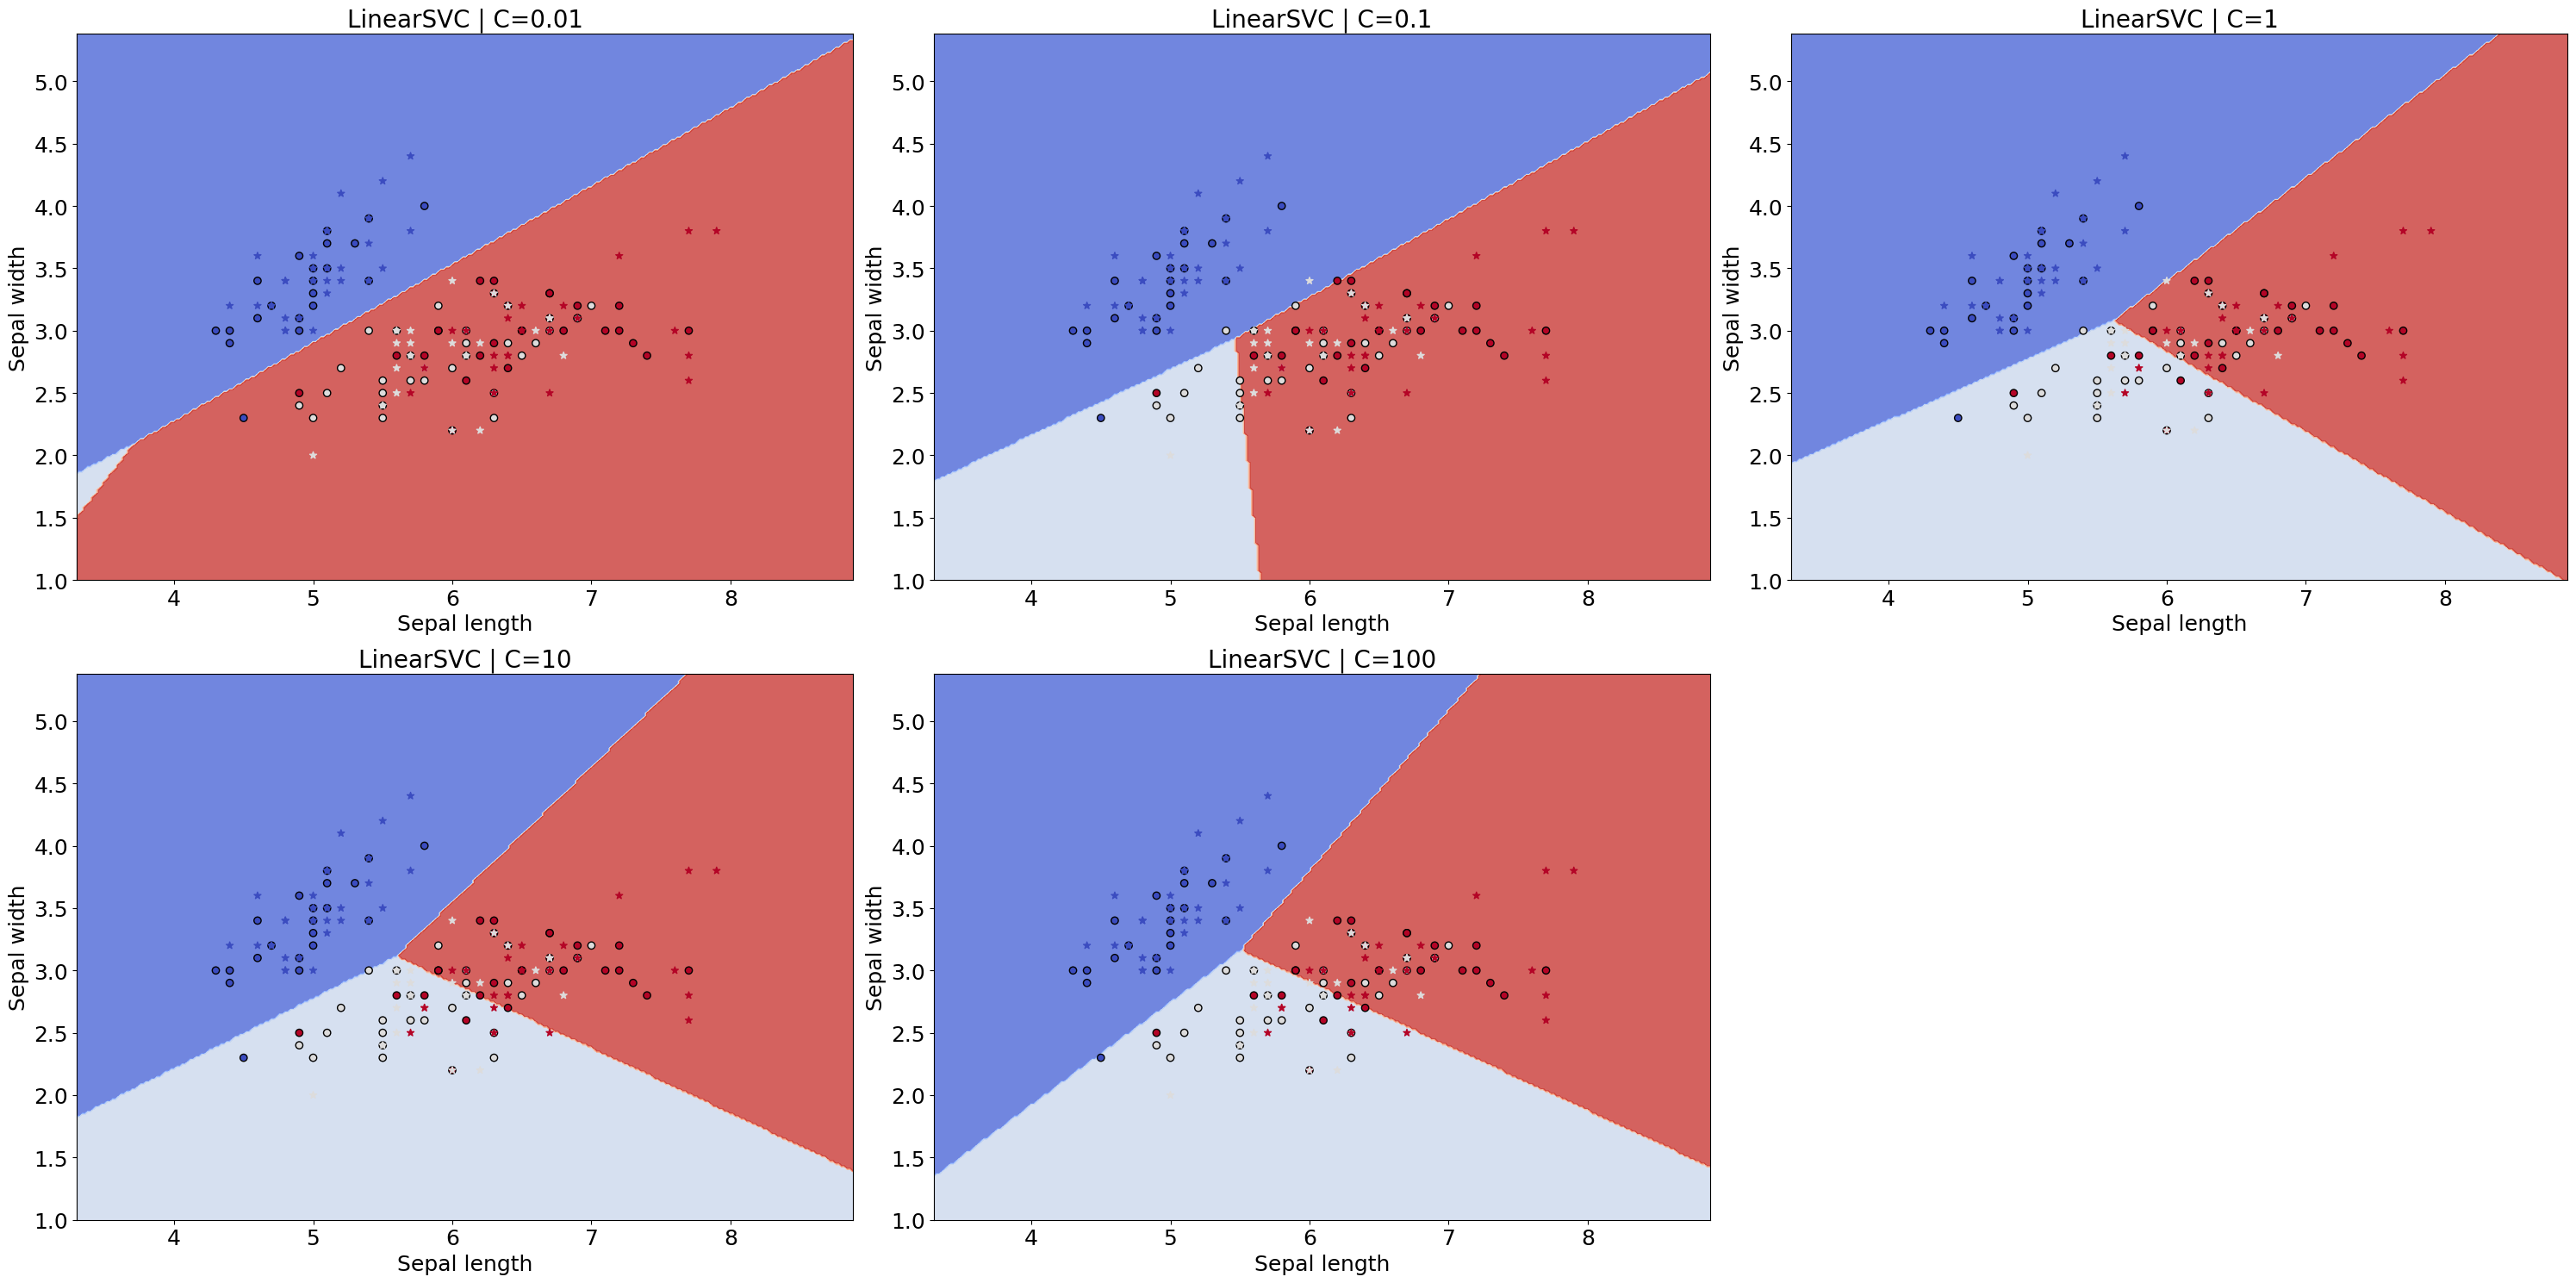

In [55]:
C_values = [0.01, 0.1, 1, 10, 100]

plt.figure(figsize=(30, 15))
num_rows = 2
num_cols = len(C_values) // num_rows + len(C_values) % num_rows

for i, C in enumerate(C_values, 1):
    lin_svc = svm.LinearSVC(C=C, dual=False)
    lin_svc.fit(X_train, y_train)
    
    Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(num_rows, num_cols, i)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
  

    plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
    plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length', fontsize=18)
    plt.ylabel('Sepal width', fontsize=18)
    plt.title(f"LinearSVC | C={C}", fontsize=20)
    plt.tick_params(axis='both', labelsize=18)

plt.tight_layout()
plt.show()


## Answer 2)

#### My observations:
When the C parameter increases, the decision boundary tends to get closer to the training data.

For low C values, such as 0.01 and 0.1, the model exhibits greater generality and a reduced risk of overfitting, but there is a potential for underfitting the data.

Higher C values, such as 10 or 100, result in a more intricate decision boundary that captures additional details in the data but tends to lead to overfitting.

#### Evaluation of the model:
While the model performs well for certain C values, the Iris dataset displays some class overlap, particularly between Versicolor and Virginica, which are not perfectly linearly separable. Consequently, this solution may not be optimal for the problem, and improvements can be made.

#### Suggestions for improvement:
Employing kernel Support Vector Machines (SVMs), such as the Radial Basis Function (RBF) kernel, to handle more complex relationships.

Exploring additional hyperparameters alongside C and fine-tuning them.

As a general recommendation, considering the utilization of dimensionality reduction techniques can be beneficial for better class separation.

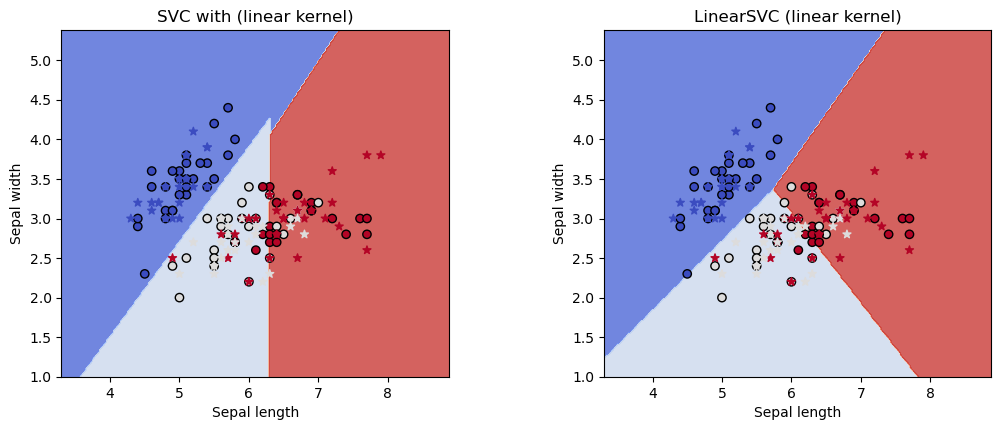

In [23]:
lin_svc = svm.LinearSVC(C=C, dual=False).fit(X_train, y_train)
svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)

titles = ['SVC with (linear kernel)', 'LinearSVC (linear kernel)']
fig = plt.figure(figsize=(12, 4.5))

for i, clf in enumerate((svc, lin_svc)):
    plt.subplot(1, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
    plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title(titles[i])
plt.show()

### Question 3: Perform the optimization of a new linear support vector machine but using the four attributes of the Iris dataset. Has the test classification score increased? For what?

In [8]:
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

C = 1.0  

lin_svc_all_attributes = svm.LinearSVC(C=C, max_iter=10000, dual=False)
lin_svc_all_attributes.fit(X_train, y_train)

score_all_attributes = lin_svc_all_attributes.score(X_test, y_test)
print(f"Accuracy on the test dataset with all four attributes: {score_all_attributes}")

Accuracy on the test dataset with all four attributes: 0.96


## Answer 3)
 The test classification score increase because using more attributes could provide the model with additional information, potentially leading to a better separation of classes. However, the actual impact on the test classification score depends on the characteristics of the data and the relationships between the attributes.

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

### Question 4 : Use Digits data to build a LinearSVC classifier and evaluate it. If the training time is too long, select a smaller part of the training base (for example 10000 samples). For what value of C do we obtain the best generalization results?

In [70]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

subset_size = min(10000, len(X))
subset_indices = np.random.choice(len(X), subset_size, replace=False)
X_subset, y_subset = X[subset_indices], y[subset_indices]

X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

best_C = None
best_accuracy = 0

for C in C_values:
    lin_svc = LinearSVC(C=C, dual=False)
    lin_svc.fit(X_train, y_train)
    
    y_pred = lin_svc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_C = C
        
print(f"Best C for Generalization: {best_C}")
print(f"Best Accuracy on the test set: {best_accuracy}")


Best C for Generalization: 0.1
Best Accuracy on the test set: 0.9666666666666667


## Answer 4)
I tested the model's performance using different C values (0.001, 0.01, 0.1, 1, 10, 100), and it turns out that the C value of 0.1 gave the best score (0.9666666666666667). In general, I noticed that when C increases, the model tends to memorize the training data too much, causing overfitting.

### Question 5: Redo the classification of the iris database but with a Gaussian kernel. Test the effect of the kernel scaling parameter (gamma) and the regularization parameter C.

In [67]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}

svc_rbf = SVC(kernel='rbf')
grid_search = GridSearchCV(svc_rbf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_svc_rbf = SVC(kernel='rbf', **best_params)
best_svc_rbf.fit(X_train, y_train)
y_pred = best_svc_rbf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
            
print(f"Best gamma: {best_params['gamma']}")
print(f"Best C: {best_params['C']}")
print(f"Best accuracy on the test set: {accuracy}")


Best gamma: 0.01
Best C: 100
Best accuracy on the test set: 1.0


Text(0.5, 1.0, 'SVM RBF')

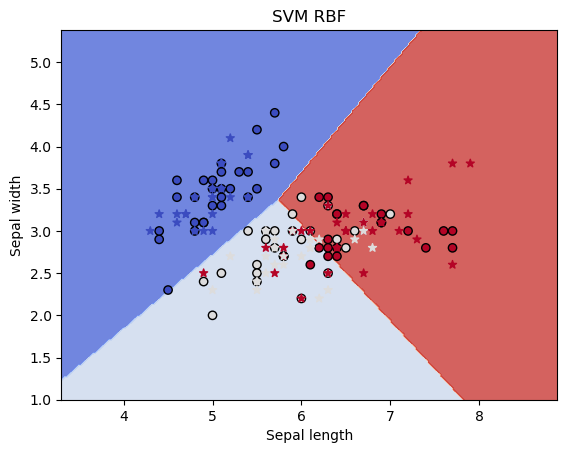

In [12]:
X, y = iris.data[:,:2], iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)


clf.fit(X_train, y_train)

h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("SVM RBF")

### Question 6: What do you see compared to the linear SVM result?

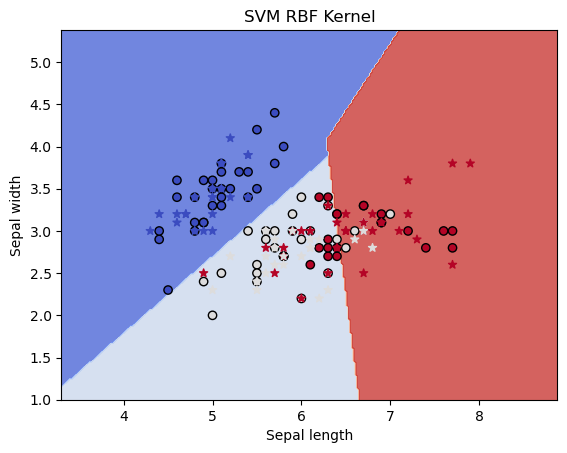

In [13]:
clf = svm.SVC(kernel='rbf', gamma=best_gamma, C=best_C)
clf.fit(X_train, y_train)

h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("SVM RBF Kernel")

plt.show()

## Answer 6)

The utilization of the RBF kernel can result in a more intricate and non-linear decision boundary as compared to the linear SVM. This implies that the RBF SVM has the capacity to identify more intricate patterns within the dataset. In cases where classes are not easily separable by a linear boundary, the RBF kernel proves beneficial. For instance, in the Iris dataset, where a straight line may not perfectly separate classes, the RBF kernel demonstrates superior performance.

The decision boundary of the RBF SVM is notably influenced by the selection of parameters, particularly C and gamma. Varying these values can substantially modify the shape and complexity of the boundary. When employing an RBF kernel, there is an increased risk of overfitting, especially if the gamma parameter is set too high. In such instances, the model may start fitting the noise in the data rather than capturing the genuine underlying pattern.